In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
import ppscore as pps
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import itertools
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import optuna
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
#from sklearn.metrics import log_loss
#from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score, precision_score, jaccard_score, recall_score, log_loss
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

# Análisis exploratorio "Ordenes de compra PORTAL 1K"

El objetivo del análisis exploratorio de datos es resumir y visualizar las principales características del conjunto de datos para extraer, entender y establecer relación entre variables. Busca determinar las características de mayor impacto a partir de la aplicación de técnicas como:

<ol>
  <li> Estadística descriptiva</li>
  <li> Agrupamiento</li>  
  <li> Correlación</li>
  <li> Análisis de variaciones</li>
</ol>

# Acerca del DataSet

El DataSet "Ordenes de compra PORTAL 1K" corresponde a una muestra de transacciones que realizan los compradores a los proveedores en el portal para los diferentes productos y servicios. Contiene tanto variables numéricas como categóricas. La información de las variables y su contenido se presentan a continuación:

 NÚMERO PEDIDO           
 ORDEN NÚMERO           
 FECHA ORDEN            
 FECHA ENTREGA          
 FECHA APROBACIÓN       
 CATEGORÍA              
 SUBCATEGORÍA           
 PROVEEDOR              
 USUARIO                
 USUARIO APROBADOR      
 DIRECCIÓN DE  ENTREGA  
 DIRECCIÓN FACTURACIÓN  
 CENTRO COSTO           
 PRESUPUESTO            
 comPAÑÍA comPRADORA    
 ESTADO                 
 PRODUCTO O SERVICIO    
 CÓDIGO PRODUCTO        
 CANTIDAD PEDIDA        
 CANTIDAD RECIBIDA      
 PRECIO UNITARIO        
 PRECIO UNITARIO + IVA  
 IVA                    
 TOTAL SIN IVA          
 TOTAL + IVA            
 FECHA ÚLTIMO MOVIMIENTO


In [4]:
#Read Dataset
#pd.set_option("display.max_columns",40)
df = pd.read_csv(r"D:\Ordenes_de_compra_PORTAL_1K.csv", sep=',', header= 0, na_values = ["  "],encoding='latin-1')
df.head()

,NÚMERO PEDIDO,ORDEN NÚMERO,FECHA ORDEN,FECHA ENTREGA,FECHA APROBACION,CATEGORÍA,SUBCATEGORIA,PROVEEDOR,USUARIO,USUARIO APROBADOR,...,PRODUCTO O SERVICIO,CODIGO PORTAL,CANTIDAD PEDIDA,CANTIDAD RECIBIDA,PRECIO UNITARIO,PRECIO UNITARIO + IVA,IVA,TOTAL SIN IVA,TOTAL + IVA,FECHA ULTIMO MOVIMIENTO
0,# 49561,# 2582,11/10/2021,11/10/2021,11/10/2021,Eléctricos y Electrónicos,Lámparas y bombillas y componentes para lámparas,Proveedor 1,Usuario solicitante 1,Usuario Aprobador 1,...,PANEL LED SOBREPONER 24W REDONDO LUZ BLANCA,1.20E+12,2.0,NaN,23364,27803,4439,46728,55606,11/10/2021
1,# 49560,# 2581,11/10/2021,11/11/2021,11/10/2021,Mercadeo y publicidad,Publicidad,Proveedor 2,Usuario solicitante 2,Usuario Aprobador 2,...,ACTIVIDADES COMERCIALES,1K15774,1.0,1.0,1476972,1757597,280625,1476972,1757597,11/10/2021
2,# 49559,# 2580,11/10/2021,11/10/2021,11/10/2021,Alimentos y Bebidas,Alimentos preparados y conservados,Proveedor 3,Usuario solicitante 3,Usuario Aprobador 3,...,Lasagna,1K7609,10.0,NaN,155,155,0,155,155,11/10/2021
3,# 49558,# 1892,11/10/2021,11/12/2021,11/10/2021,Alimentos y Bebidas,Productos de carne y aves de corral,Proveedor 4,Usuario solicitante 4,Usuario Aprobador 4,...,Pecho de Res Limpio/Sin Grasa,1K15459,50.0,NaN,22,22,0,1100000,1100000,11/10/2021
4,# 49557,# 1,11/10/2021,11/9/2021,11/10/2021,Imprenta y litografía,Otra,Proveedor 5,Usuario solicitante 5,Usuario Aprobador 5,...,"LIBRO CABEZA, CORAZON Y MANOS",1K15761,7.0,7.0,92084,10958,17496,644588,76706,11/10/2021


In [5]:
df.rename(columns={'NÚMERO PEDIDO': 'Numero_Pedido',
                  'ORDEN NÚMERO': 'Orden_Numero',
                  'FECHA ORDEN': 'Fecha_Orden',
                  'FECHA ENTREGA': 'Fecha_Entrega',
                  'FECHA APROBACION': 'Fecha_Aprobacion',
                  'CATEGORÍA': 'Categoria',
                  'SUBCATEGORIA': 'Subcategoria',
                  'PROVEEDOR': 'Proveedor',
                  'USUARIO': 'Usuario',
                  'USUARIO APROBADOR': 'Usuario_Aprobador',
                  'DIRECCION PEDIDO': 'Direccion_Pedido',
                  'DIRECCION FACTURACION': 'Direccion_Facturacion',
                  'CENTRO DE COSTOS': 'Centro_Costos',
                  'PRESUPUESTO': 'Presupuesto',
                  'PORTAL': 'Portal',
                  'ESTADO': 'Estado',
                  'PRODUCTO O SERVICIO': 'Producto_Servicio',
                  'CODIGO PORTAL': 'Codigo_Producto',
                  'CANTIDAD PEDIDA': 'Cantidad_Pedida',
                  'CANTIDAD RECIBIDA': 'Cantidad_Recibida',
                  'PRECIO UNITARIO': 'Precio_Unitario',
                  'PRECIO UNITARIO + IVA': 'Precio_Unitario_IVA',
                  'IVA': 'IVA',
                  'TOTAL SIN IVA': 'Total_Sin_IVA',
                  'TOTAL + IVA': 'Total_IVA',
                  'FECHA ULTIMO MOVIMIENTO': 'Fecha_Ultimo_Movimiento'}, inplace=True)

In [6]:
# cambio formato fechas
df['Fecha_Orden'] = pd.to_datetime(df['Fecha_Orden'], format = "%m/%d/%Y")
df['Fecha_Entrega'] = pd.to_datetime(df['Fecha_Entrega'], format = "%m/%d/%Y")
df['Fecha_Aprobacion'] = pd.to_datetime(df['Fecha_Aprobacion'], format = "%m/%d/%Y")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23083 entries, 0 to 23082
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Numero_Pedido            23083 non-null  object        
 1   Orden_Numero             23083 non-null  object        
 2   Fecha_Orden              23083 non-null  datetime64[ns]
 3   Fecha_Entrega            18770 non-null  datetime64[ns]
 4   Fecha_Aprobacion         21950 non-null  datetime64[ns]
 5   Categoria                23083 non-null  object        
 6   Subcategoria             23083 non-null  object        
 7   Proveedor                23083 non-null  object        
 8   Usuario                  23083 non-null  object        
 9   Usuario_Aprobador        21950 non-null  object        
 10  Direccion_Pedido         23083 non-null  object        
 11  Direccion_Facturacion    10828 non-null  object        
 12  Centro_Costos            16672 n

In [831]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cantidad_Pedida,23083.0,191.208232,1.946639e+03,0.27,2.0,7.0,40.0,120000.0
Cantidad_Recibida,16013.0,69.835325,1.040933e+03,0.00,2.0,5.0,18.0,53620.0
Precio_Unitario,23083.0,59149.630767,6.331279e+05,0.00,244.0,1706.0,22274.0,33242814.0
Precio_Unitario_IVA,23083.0,63580.384395,7.239502e+05,0.00,103.0,833.0,9877.0,39558949.0
IVA,23083.0,9264.859420,1.011564e+05,0.00,95.0,781.0,5067.0,6316135.0
Total_Sin_IVA,23083.0,430121.193216,3.123982e+06,0.00,816.0,32269.0,187669.5,299185326.0
Total_IVA,23083.0,477529.760040,3.545482e+06,0.00,515.0,11995.0,146054.5,356030538.0


In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

In [ ]:
profile

In [8]:
%matplotlib inline

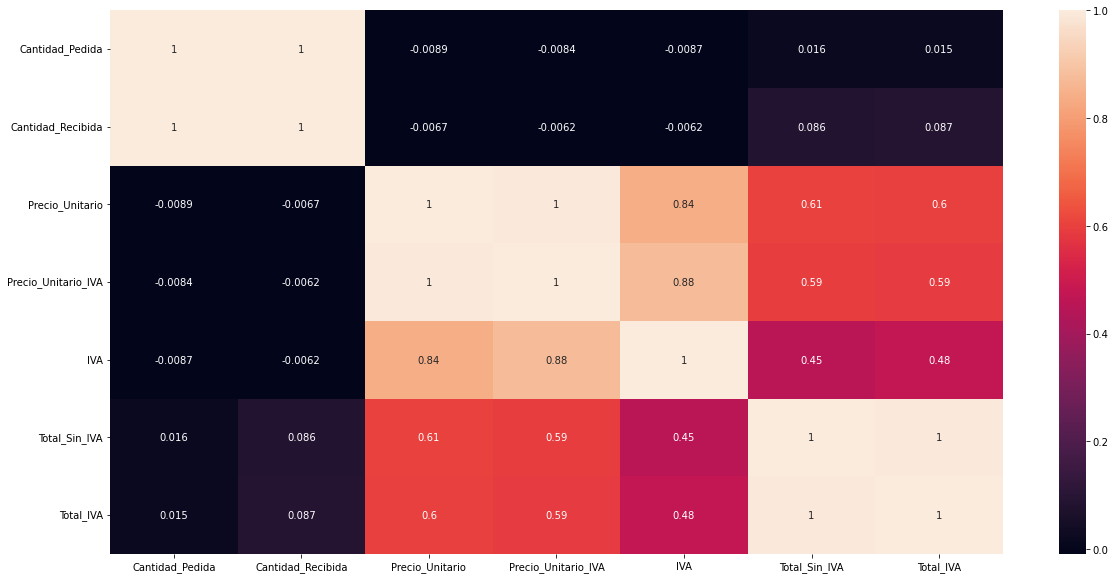

In [9]:
plt.figure(figsize=(20,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()
#plt.savefig("matixdf_full.png")

In [10]:
# campos eliminados despues de revision de matrix de correlacion
df.drop(['Producto_Servicio','Portal','Usuario_Aprobador','Usuario','Subcategoria','Presupuesto',"Precio_Unitario_IVA","Cantidad_Recibida", "Total_Sin_IVA", "IVA", "Codigo_Producto", "Direccion_Facturacion", "Centro_Costos", "Numero_Pedido", "Orden_Numero"], axis=1, inplace = True)

#### Data Cleaning

In [11]:
d3_Cantidad_Pedida = df['Cantidad_Pedida'].mean() + 3*df['Cantidad_Pedida'].std()
d3_Precio_Unitario = df['Precio_Unitario'].mean() + 3*df['Precio_Unitario'].std()
d3_Total_IVA = df['Total_IVA'].mean() + 3*df['Total_IVA'].std()

In [12]:
df = df[(df['Cantidad_Pedida'] < d3_Cantidad_Pedida) & (df['Precio_Unitario'] < d3_Precio_Unitario) &  (df['Total_IVA'] < d3_Total_IVA)]

In [ ]:
profile2 = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile2

In [13]:
df.groupby(["Estado"]).Cantidad_Pedida.describe()

,count,mean,std,min,25%,50%,75%,max
Estado,,,,,,,,
Cancelado,1129.0,54.227192,293.055958,1.00,2.00,4.0,12.00,5000.0
Enviado,10.0,213.800000,628.347533,1.00,1.25,6.0,11.00,2000.0
Finalizado Incompleto,934.0,28.777302,139.907961,1.00,1.00,3.0,9.75,2400.0
Orden Confirmada,10.0,11.300000,11.035800,1.00,3.25,7.0,17.25,36.0
Orden Rechazada,1003.0,18.504686,77.727792,0.30,2.00,4.0,12.00,2000.0
Orden en Proceso,4716.0,158.705831,451.164165,0.50,12.00,60.0,144.00,6000.0
Pendiente por Aprobar,49.0,22.061224,38.821390,1.00,1.00,2.0,30.00,192.0
Recibido,14722.0,42.734291,243.891111,0.27,2.00,5.0,20.00,6000.0
Recibido Parcial,158.0,59.930380,288.872509,1.00,3.00,7.0,16.00,2500.0


In [ ]:
df.groupby(["Estado"]).Precio_Unitario.describe()

#### Feature Engineering

In [ ]:
-Dias_Trasncurridos_Entrega: Fecha Entrega vs Fecha Orden
-Convertir estado: Rechazado a 1 y el resto a 0

In [14]:
df["Dias_Trasncurridos_Entrega"] = (df["Fecha_Entrega"] - df["Fecha_Orden"]).dt.days

In [15]:
df

,Fecha_Orden,Fecha_Entrega,Fecha_Aprobacion,Categoria,Proveedor,Direccion_Pedido,Estado,Cantidad_Pedida,Precio_Unitario,Total_IVA,Fecha_Ultimo_Movimiento,Dias_Trasncurridos_Entrega
0,2021-11-10,2021-11-10,2021-11-10,Eléctricos y Electrónicos,Proveedor 1,Direccion 1,Orden en Proceso,2.0,23364,55606,11/10/2021,0.0
1,2021-11-10,2021-11-11,2021-11-10,Mercadeo y publicidad,Proveedor 2,Direccion 1,Recibido,1.0,1476972,1757597,11/10/2021,1.0
2,2021-11-10,2021-11-10,2021-11-10,Alimentos y Bebidas,Proveedor 3,Direccion 2,Orden en Proceso,10.0,155,155,11/10/2021,0.0
3,2021-11-10,2021-11-12,2021-11-10,Alimentos y Bebidas,Proveedor 4,Direccion 3,Orden en Proceso,50.0,22,1100000,11/10/2021,2.0
4,2021-11-10,2021-11-09,2021-11-10,Imprenta y litografía,Proveedor 5,Direccion 4,Recibido,7.0,92084,76706,11/10/2021,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23078,2018-04-30,NaT,2018-05-01,"Aseo, Cafetería y Oficina",Proveedor 229,Direccion 81,Recibido,8.0,33613,320,5/1/2018,NaN
23079,2018-04-30,NaT,2018-05-01,"Aseo, Cafetería y Oficina",Proveedor 229,Direccion 81,Recibido,1.0,588,700,5/1/2018,NaN
23080,2018-04-30,NaT,2018-05-01,Moda y accesorios,Proveedor 229,Direccion 81,Recibido,3.0,29412,105,5/1/2018,NaN
23081,2018-04-30,NaT,2018-04-30,Moda y accesorios,Proveedor 229,Direccion 81,Recibido,4.0,29412,140,5/1/2018,NaN


In [16]:
## - Convertir estado: Rechazado a 1 y el resto a 0
df['Estado_label'] = 0

In [17]:
df.loc[df['Estado'] == 'Orden Rechazada', 'Estado_label'] = 1

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22731 entries, 0 to 23082
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Fecha_Orden                 22731 non-null  datetime64[ns]
 1   Fecha_Entrega               18557 non-null  datetime64[ns]
 2   Fecha_Aprobacion            21609 non-null  datetime64[ns]
 3   Categoria                   22731 non-null  object        
 4   Proveedor                   22731 non-null  object        
 5   Direccion_Pedido            22731 non-null  object        
 6   Estado                      22731 non-null  object        
 7   Cantidad_Pedida             22731 non-null  float64       
 8   Precio_Unitario             22731 non-null  int64         
 9   Total_IVA                   22731 non-null  int64         
 10  Fecha_Ultimo_Movimiento     22731 non-null  object        
 11  Dias_Trasncurridos_Entrega  18557 non-null  float64   

In [19]:
df["Estado"].value_counts()

Recibido                 14722
Orden en Proceso          4716
Cancelado                 1129
Orden Rechazada           1003
Finalizado Incompleto      934
Recibido Parcial           158
Pendiente por Aprobar       49
Enviado                     10
Orden Confirmada            10
Name: Estado, dtype: int64

In [20]:
df["Categoria"].value_counts(normalize=True)

Alimentos y Bebidas                            0.300427
Vigilancia y seguridad industrial              0.295324
Aseo, Cafetería y Oficina                      0.167964
Dotación y elementos de protección personal    0.052483
Ferreteria                                     0.034622
Almacenamiento y empaques                      0.019841
Vehículos y repuestos                          0.015969
Químicos y derivados                           0.015090
Construcción y Mantenimiento                   0.011878
Manufactura                                    0.008975
Mercadeo y publicidad                          0.008799
Logística y transporte                         0.007875
Servicios Profesionales                        0.007655
Eléctricos y Electrónicos                      0.007479
Mobiliario y decoración                        0.007259
Textiles                                       0.006643
Moda y accesorios                              0.006423
Tecnología e información                       0

In [21]:
## filtramos el dataset por las categorias mayores al 15%
categorias_si = ['Alimentos y Bebidas','Vigilancia y seguridad industrial','Aseo, Cafetería y Oficina']

df = df[df.Categoria.isin(categorias_si)]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17360 entries, 2 to 23082
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Fecha_Orden                 17360 non-null  datetime64[ns]
 1   Fecha_Entrega               13728 non-null  datetime64[ns]
 2   Fecha_Aprobacion            16733 non-null  datetime64[ns]
 3   Categoria                   17360 non-null  object        
 4   Proveedor                   17360 non-null  object        
 5   Direccion_Pedido            17360 non-null  object        
 6   Estado                      17360 non-null  object        
 7   Cantidad_Pedida             17360 non-null  float64       
 8   Precio_Unitario             17360 non-null  int64         
 9   Total_IVA                   17360 non-null  int64         
 10  Fecha_Ultimo_Movimiento     17360 non-null  object        
 11  Dias_Trasncurridos_Entrega  13728 non-null  float64   

In [23]:
df["Categoria"].value_counts()

Alimentos y Bebidas                  6829
Vigilancia y seguridad industrial    6713
Aseo, Cafetería y Oficina            3818
Name: Categoria, dtype: int64

In [24]:
df_encoder = df.copy()

In [25]:
## cambio de variables categoricas con labelencoder
lb_encoder = LabelEncoder()
df_encoder["Categoria_label_encode"] = lb_encoder.fit_transform(df_encoder["Categoria"])
df_encoder["Proveedor_label_encode"] = lb_encoder.fit_transform(df_encoder["Proveedor"])
df_encoder["Direccion_Pedido_label_encode"] = lb_encoder.fit_transform(df_encoder["Direccion_Pedido"])

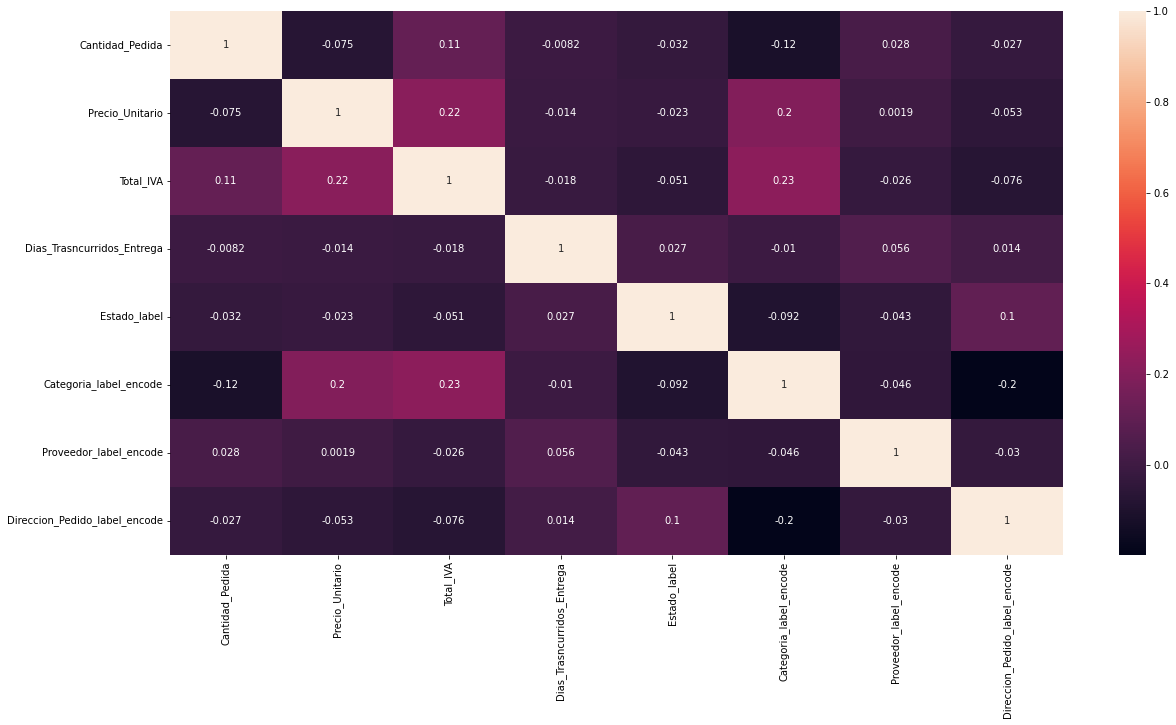

In [26]:
plt.figure(figsize=(20,10))
corr_matrix = df_encoder.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()
#plt.savefig("matixdf_encode.png")

In [903]:
df_encoder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17360 entries, 2 to 23082
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cantidad_Pedida                17360 non-null  float64
 1   Precio_Unitario                17360 non-null  int64  
 2   Total_IVA                      17360 non-null  int64  
 3   Dias_Trasncurridos_Entrega     13728 non-null  float64
 4   Estado_label                   17360 non-null  int64  
 5   Categoria_label_encode         17360 non-null  int32  
 6   Proveedor_label_encode         17360 non-null  int32  
 7   Direccion_Pedido_label_encode  17360 non-null  int32  
dtypes: float64(2), int32(3), int64(3)
memory usage: 1017.2 KB


In [27]:
##borrado de variables del dataset IDs
df_encoder = df_encoder.drop(['Fecha_Orden','Fecha_Entrega','Fecha_Aprobacion','Categoria','Proveedor','Direccion_Pedido','Estado','Fecha_Ultimo_Movimiento'], axis=1)

In [28]:
df_encoder.describe().T

,count,mean,std,min,25%,50%,75%,max
Cantidad_Pedida,17360.0,56.459489,221.661325,0.27,2.0,10.0,48.0,6000.0
Precio_Unitario,17360.0,19543.831970,48638.361122,0.00,448.5,4297.0,26666.0,1464000.0
Total_IVA,17360.0,336949.128168,986442.221109,0.00,515.0,9945.0,124998.0,10884472.0
Dias_Trasncurridos_Entrega,13728.0,1.008960,11.006769,-293.00,0.0,0.0,1.0,21.0
Estado_label,17360.0,0.031912,0.175772,0.00,0.0,0.0,0.0,1.0
Categoria_label_encode,17360.0,0.993318,0.883215,0.00,0.0,1.0,2.0,2.0
Proveedor_label_encode,17360.0,78.310945,30.992682,0.00,64.0,79.0,87.0,144.0
Direccion_Pedido_label_encode,17360.0,69.461866,39.009903,0.00,43.0,68.0,84.0,146.0


In [848]:
df_encoder

,Cantidad_Pedida,Precio_Unitario,Total_IVA,Dias_Trasncurridos_Entrega,Estado_label,Categoria_label_encode,Proveedor_label_encode,Direccion_Pedido_label_encode
2,10.0,155,155,0.0,0,0,77,74
3,50.0,22,1100000,2.0,0,0,118,84
18,100.0,2498,2498000,1.0,0,0,4,84
22,50.0,205,1025000,1.0,0,0,118,84
23,6.0,27059,1932,1.0,0,0,18,84
...,...,...,...,...,...,...,...,...
23076,3.0,84,300,NaN,0,2,42,129
23077,1.0,84,100,NaN,0,2,42,129
23078,8.0,33613,320,NaN,0,1,42,129
23079,1.0,588,700,NaN,0,1,42,129


In [29]:
#features to X
df_features = df_encoder.loc[:, df_encoder.columns != 'Estado_label']
X = np.asarray(df_features)
X = np.nan_to_num(X)

In [ ]:
# normalizar con min max scaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [30]:
X.shape

(17360, 7)

In [31]:
#labels (target) to y
y = np.asarray(df_encoder['Estado_label'])
y [0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [32]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 16806, 1: 554})


In [33]:
# separamo del 80% del train el 10% para validacion  quedando train 70%- test 20% - valid 10%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2,stratify=df_encoder["Estado_label"])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print ('Valid set:', X_val.shape,  y_val.shape)

Train set: (12499, 7) (12499,)
Test set: (3472, 7) (3472,)
Valid set: (1389, 7) (1389,)


In [34]:
print(len(X_train),Counter(y_train))

12499 Counter({0: 12110, 1: 389})


In [453]:
print(Counter(y_test))

Counter({0: 3361, 1: 111})


In [35]:
# transform the dataset  SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [36]:
counter = Counter(y_train)
print(counter)

Counter({0: 12110, 1: 12110})


In [37]:
#develop matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### DecisionTree

In [38]:
#drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4, class_weight="balanced")
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [39]:
predTree = drugTree.predict(X_test)
pscores_tree = drugTree.predict_proba(X_test)

In [124]:
pscores_tree[3]

array([1., 0.])

In [125]:
predTree[3]

0

In [126]:
y_test[3]

0

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      3361
           1       0.17      0.72      0.27       111

    accuracy                           0.88      3472
   macro avg       0.58      0.80      0.60      3472
weighted avg       0.96      0.88      0.91      3472

Confusion matrix, without normalization
[[2961  400]
 [  31   80]]


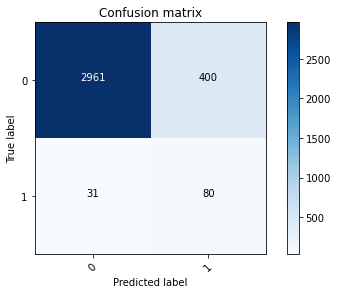

In [40]:
# Compute confusion matrix
y_pred_DT = pscores_tree[:,1]>0.8
cnf_matrix = confusion_matrix(y_test, y_pred_DT, labels = [0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred_DT))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = [0,1], normalize= False,  title='Confusion matrix')
plt.show()

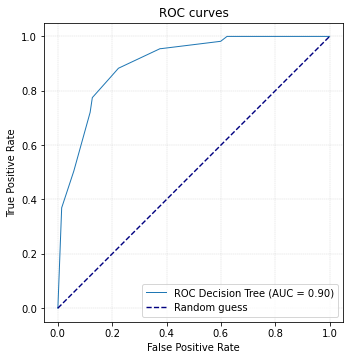

In [41]:
# DT
roc_RF = metrics.roc_curve(y_test, pscores_tree[:,1])
auc_RF = metrics.auc( roc_RF[0], roc_RF[1] )


plt.figure(figsize=(5.5,5.5))
plt.plot(roc_RF[0], roc_RF[1], lw=1,label=f"ROC Decision Tree (AUC = {auc_RF:0.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=1.4, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc='lower right')
plt.gca().set_aspect(1)
plt.grid(ls='--', alpha=0.6, lw=0.4)
plt.show()

### Random Forest

In [42]:
#RF-
forest_class = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=4)
forest_class.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=4)

In [43]:
predforest = forest_class.predict(X_test)
pscores_forest = forest_class.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      3361
           1       0.14      0.66      0.23       111

    accuracy                           0.86      3472
   macro avg       0.57      0.76      0.58      3472
weighted avg       0.96      0.86      0.90      3472

Confusion matrix, without normalization
[[2923  438]
 [  38   73]]


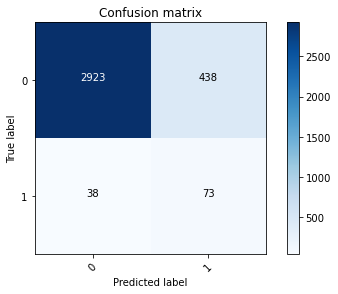

In [44]:
# Compute confusion matrix
y_pred_forest = pscores_forest[:,1]>0.65
cnf_matrix = confusion_matrix(y_test, y_pred_forest, labels = [0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred_forest))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = [0,1], normalize= False,  title='Confusion matrix')
plt.show()

In [45]:
kf = StratifiedKFold(n_splits=10)
forest_class = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=4)
forest_class.fit(X_train, y_train)
 
score = forest_class.score(X_train,y_train)
print("Metrica del modelo", score)
scores = cross_val_score(forest_class, X_train, y_train, cv=kf, scoring="accuracy")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

pscores_forest = forest_class.predict_proba(X_test)
predforest = pscores_forest[:,1]>0.65
score_pred = metrics.accuracy_score(y_test, predforest)
print("Metrica en Test", score_pred)

Metrica del modelo 0.8218001651527663
Metricas cross_validation [0.83 0.85 0.85 0.82 0.84 0.85 0.86 0.83 0.85 0.86]
Media de cross_validation 0.8456647398843928
Metrica en Test 0.8629032258064516


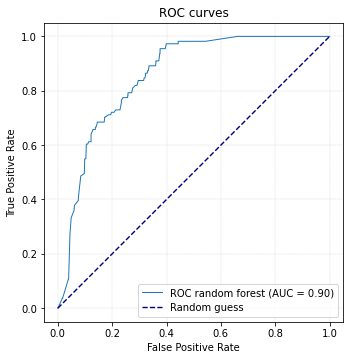

In [46]:
# DT
roc_forest = metrics.roc_curve(y_test, pscores_forest[:,1])
auc_forest = metrics.auc( roc_forest[0], roc_forest[1] )


plt.figure(figsize=(5.5,5.5))
plt.plot(roc_forest[0], roc_forest[1], lw=1,label=f"ROC random forest (AUC = {auc_RF:0.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=1.4, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc='lower right')
plt.gca().set_aspect(1)
plt.grid(ls='--', alpha=0.6, lw=0.4)
plt.show()

### SVM

In [47]:
#clf = svm.SVC(kernel='rbf', C=3, probability=True, class_weight="balanced")
clf = svm.SVC(kernel='rbf', C=3, probability=True)
clf.fit(X_train, y_train)

SVC(C=3, probability=True)

In [48]:
yhat_SVM = clf.predict(X_test)
pscores_svm = clf.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.98      0.43      0.59      3361
           1       0.04      0.79      0.08       111

    accuracy                           0.44      3472
   macro avg       0.51      0.61      0.34      3472
weighted avg       0.95      0.44      0.58      3472

Confusion matrix, without normalization
[[1431 1930]
 [  23   88]]


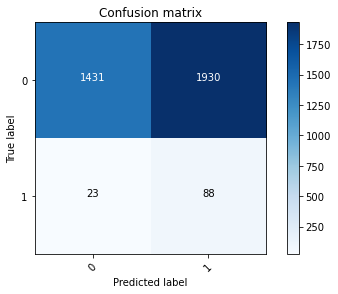

In [56]:
# Compute confusion matrix
y_pred_SVM = pscores_svm[:,1]>0.5
cnf_matrix = confusion_matrix(y_test, y_pred_SVM, labels = [0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred_SVM))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = [0,1], normalize= False,  title='Confusion matrix')
plt.show()

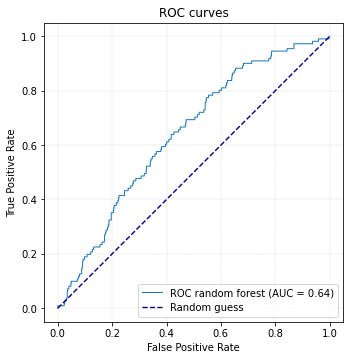

In [57]:
roc_RF = metrics.roc_curve(y_test, pscores_svm[:,1])
auc_RF = metrics.auc( roc_RF[0], roc_RF[1] )


plt.figure(figsize=(5.5,5.5))
plt.plot(roc_RF[0], roc_RF[1], lw=1,label=f"ROC random forest (AUC = {auc_RF:0.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=1.4, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc='lower right')
plt.gca().set_aspect(1)
plt.grid(ls='--', alpha=0.6, lw=0.4)

In [618]:
kf = StratifiedKFold(n_splits=5)
#clf = svm.SVC(kernel='rbf', C=3, probability=True, class_weight="balanced")
clf = svm.SVC(kernel='rbf', C=3, probability=True)
clf.fit(X_train, y_train)
 
score = clf.score(X_train,y_train)
print("Metrica del modelo", score)
scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring="accuracy")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

preds = clf.predict_proba(X_test)
y_pred_SVM = preds[:,1]>0.5
score_pred = metrics.accuracy_score(y_test, y_pred_SVM)
print("Metrica en Test", score_pred)

Metrica del modelo 0.6039223781998349
Metricas cross_validation [0.6  0.6  0.6  0.6  0.61]
Media de cross_validation 0.602766308835673
Metrica en Test 0.4375


### Logistic Regresion

In [58]:
LR = LogisticRegression(C=0.05, solver='liblinear').fit(X_train,y_train)

In [59]:
yhat_LR = LR.predict(X_test)
pscores_LR = LR.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      3361
           1       0.07      0.59      0.12       111

    accuracy                           0.74      3472
   macro avg       0.53      0.66      0.48      3472
weighted avg       0.95      0.74      0.82      3472

Confusion matrix, without normalization
[[2489  872]
 [  46   65]]


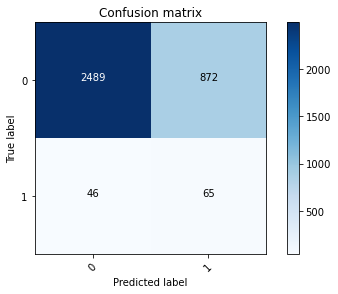

In [60]:
# Compute confusion matrix
y_pred_LR = pscores_LR[:,1]>0.62
cnf_matrix = confusion_matrix(y_test, y_pred_LR, labels = [0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred_LR))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = [0,1], normalize= False,  title='Confusion matrix')
plt.show()

In [897]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat_LR, average='weighted')

0.749521020765976

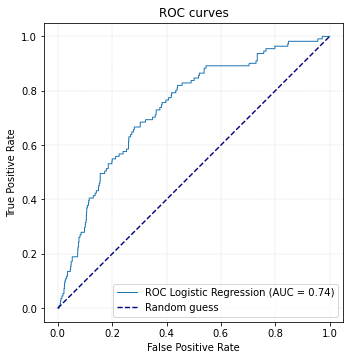

In [61]:
roc_RF = metrics.roc_curve(y_test, pscores_LR[:,1])
auc_RF = metrics.auc( roc_RF[0], roc_RF[1] )


plt.figure(figsize=(5.5,5.5))
plt.plot(roc_RF[0], roc_RF[1], lw=1,label=f"ROC Logistic Regression (AUC = {auc_RF:0.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=1.4, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc='lower right')
plt.gca().set_aspect(1)
plt.grid(ls='--', alpha=0.6, lw=0.4)

### comparacion Curvas

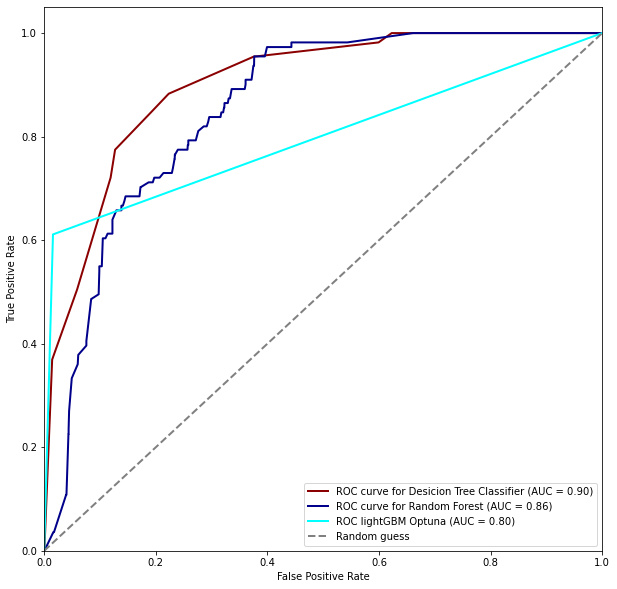

In [111]:
# ROC CURVES
roc_RF = metrics.roc_curve(y_test, pscores_forest[:, 1])
auc_RF = metrics.auc( roc_RF[0], roc_RF[1] )
roc_DT = metrics.roc_curve(y_test, pscores_tree[:, 1])
auc_DT = metrics.auc( roc_DT[0], roc_DT[1] )
roc_SVM = metrics.roc_curve(y_test, pscores_svm[:,1])
auc_SVM = metrics.auc( roc_SVM[0], roc_SVM[1] )
roc_LR = metrics.roc_curve(y_test, pscores_LR[:,1])
auc_LR = metrics.auc( roc_LR[0], roc_LR[1] )
roc_lgbm = metrics.roc_curve(y_val, y_predict)
auc_lgbm = metrics.auc( roc_lgbm[0], roc_lgbm[1] )
roc_lgbm_opt = metrics.roc_curve(y_val, ypred_opt_test)
auc_lgbm_opt = metrics.auc( roc_lgbm_opt[0], roc_lgbm_opt[1] )





plt.figure(figsize=(10,10))
line_width = 2
#plt.plot(roc_LR[0], roc_LR[1], color='darkgreen', lw=line_width,
         #label=f"ROC curve for Logistic Regression Classifier (AUC = {auc_LR:0.2f})")
plt.plot(roc_DT[0], roc_DT[1], color='darkred', lw=line_width,
         label=f"ROC curve for Desicion Tree Classifier (AUC = {auc_DT:0.2f})")
#plt.plot(roc_SVM[0], roc_SVM[1], color='darkorange', lw=line_width,
         #label=f"ROC curve for Support Vector Machine (AUC = {auc_SVM:0.2f})")
plt.plot(roc_RF[0], roc_RF[1], color='darkblue', lw=line_width,
         label=f"ROC curve for Random Forest (AUC = {auc_RF:0.2f})")
#plt.plot(roc_lgbm[0], roc_lgbm[1], color='yellow', lw=line_width,
         #label=f"ROC lightGBM (AUC = {auc_lgbm:0.2f})")
plt.plot(roc_lgbm_opt[0], roc_lgbm_opt[1], color='cyan', lw=line_width,
         label=f"ROC lightGBM Optuna (AUC = {auc_lgbm_opt:0.2f})")

plt.plot([0, 1], [0, 1], color='gray', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Classification for Enrollment in the Employment Program')
plt.legend(loc='lower right')
plt.show()

### Arbol de decision 

In [911]:
feature_names = ['Cantidad_Pedida','Precio_Unitario','Total_IVA','Dias_Transcurridos_Entrega','Categoria_label_encode','Proveedor_label_encode', 'Direccion_Pedido_label_encode']
class_names = ['No Rechazado','Rechazado']
dot_data = tree.export_graphviz(drugTree, out_file=None, filled=True, rounded = True, feature_names=feature_names, class_names=class_names)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

### lightgbm

In [63]:
# separamo del 80% del train el 10% para validacion  quedando train 72%- test 20% - valid 8%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2,stratify=df_encoder["Estado_label"])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print ('Valid set:', X_val.shape,  y_val.shape)

Train set: (12499, 7) (12499,)
Test set: (3472, 7) (3472,)
Valid set: (1389, 7) (1389,)


In [64]:
# transform the dataset  SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [65]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print ('Valid set:', X_val.shape,  y_val.shape)

Train set: (24220, 7) (24220,)
Test set: (3472, 7) (3472,)
Valid set: (1389, 7) (1389,)


In [66]:
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [67]:
print(Counter(y_test))

Counter({0: 3361, 1: 111})


In [477]:
len(X_train)

26890

In [68]:
print(Counter(y_train))

Counter({0: 12110, 1: 12110})


In [69]:
## parametros para el modelo lightGBM search 
SEARCH_PARAMS = {'learning_rate': 0.4,
                'max_depth': 15,
                'num_leaves': 32,
                'feature_fraction': 0.8,
                'subsample': 0.2}

FIXED_PARAMS={'objective': 'binary',
             'metric': 'auc',
             'is_unbalance':False,
             'bagging_freq':5,
             'boosting':'dart',
             'num_boost_round':300,
             'early_stopping_rounds':30}



In [70]:
params = {'metric':FIXED_PARAMS['metric'],
             'objective':FIXED_PARAMS['objective'],**SEARCH_PARAMS}

In [71]:
model = lgb.train(params, train_data,                     
                     valid_sets=[valid_data],
                     num_boost_round=FIXED_PARAMS['num_boost_round'],
                     early_stopping_rounds=FIXED_PARAMS['early_stopping_rounds'],
                     valid_names=['valid'])

C:\Users\d84088661\Anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 12110, number of negative: 12110
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1779
[LightGBM] [Info] Number of data points in the train set: 24220, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[1]	valid's auc: 0.907838
Training until validation scores don't improve for 30 rounds
[2]	valid's auc: 0.926937
[3]	valid's auc: 0.930563
[4]	valid's auc: 0.933253
[5]	valid's auc: 0.935733
[6]	valid's auc: 0.937654
[7]	valid's auc: 0.944592
[8]	valid's auc: 0.944993
[9]	valid's auc: 0.944972
[10]	valid's auc: 0.948445
[11]	valid's auc: 0.950014
[12]	valid's auc: 0.94822
[13]	valid's auc: 0.950538
[14]	valid's auc: 0.951817
[15]	valid's auc: 0.952194
[16]	valid's auc: 0.951446
[17]	valid's auc: 0.952178
[18]	valid's auc: 0.952323
[19]	valid's auc: 0.95

In [519]:
score = model.best_score['valid']['auc']

In [520]:
score

0.9598762702005784

In [72]:
## score de test
y_predict = model.predict(X_val,num_iteration=model.best_iteration)

In [73]:
# conocer el numero de iteraciones realizadas por el modelo
num_iteration =model.best_iteration
num_iteration

116

In [74]:
#convert into binary values	
for i in range(0,len(X_val)):	
    if y_predict[i]>=.5:       # setting threshold to .5	
            y_predict[i]=1
    else:
        y_predict[i]=0

In [75]:
accuracy=accuracy_score(y_val,y_predict)

In [76]:
accuracy

0.9647228221742261

In [77]:
print(classification_report(y_val, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1335
           1       0.55      0.50      0.52        54

    accuracy                           0.96      1389
   macro avg       0.77      0.74      0.75      1389
weighted avg       0.96      0.96      0.96      1389



Confusion matrix, without normalization
[[1313   22]
 [  27   27]]


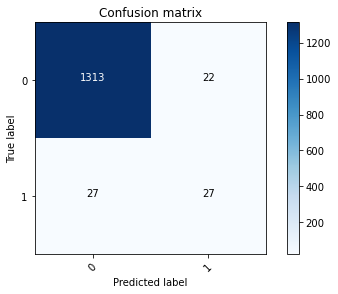

In [78]:
#confusion Matrix
plt.figure()
cf_matrix =confusion_matrix(y_val, y_predict,labels = [0,1])
np.set_printoptions(precision=2)
plot_confusion_matrix(cf_matrix, classes = [0,1], normalize= False,  title='Confusion matrix')
plt.show()


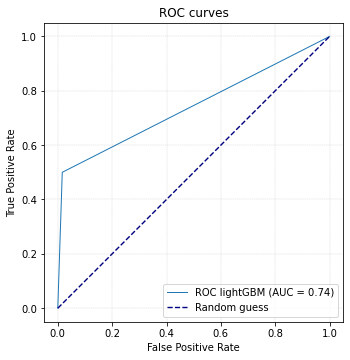

In [79]:
### curva roc
roc_lgbm = metrics.roc_curve(y_val, y_predict)
auc_lgbm = metrics.auc( roc_lgbm[0], roc_lgbm[1] )


plt.figure(figsize=(5.5,5.5))
plt.plot(roc_lgbm[0], roc_lgbm[1], lw=1,label=f"ROC lightGBM (AUC = {auc_lgbm:0.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=1.4, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc='lower right')
plt.gca().set_aspect(1)
plt.grid(ls='--', alpha=0.6, lw=0.4)

### Evaluacion 

In [94]:
columns=['Algorithm','Jaccard','F1-score','LogLoss','Accuracy','Recall','Precision']
matrix=pd.DataFrame([['Random Forest',0,0,'NA',0,0,0],
                     ['Decision Tree',0,0,'NA',0,0,0],
                     ['SVM',0,0,'NA',0,0,0],
                     ['Logistic Regression',0,0,'NA',0,0,0],
                     ['LightGBM',0,0,'NA',0,0,0],
                     ['LightGBM_OPT',0,0,'NA',0,0,0]],columns=columns)
matrix=matrix.set_index('Algorithm')
matrix

,Jaccard,F1-score,LogLoss,Accuracy,Recall,Precision
Algorithm,,,,,,
Random Forest,0,0,NA,0,0,0
Decision Tree,0,0,NA,0,0,0
SVM,0,0,NA,0,0,0
Logistic Regression,0,0,NA,0,0,0
LightGBM,0,0,NA,0,0,0
LightGBM_OPT,0,0,NA,0,0,0


### Evaluacion Decision Tree

In [95]:
#loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4).fit(X_val,y_val)
yhat_DT_val=drugTree.predict(X_val)
pscores_tree_val = drugTree.predict_proba(X_val)
y_pred_DT_val = pscores_tree_val[:,1]>0.8
#Jaccard
jaccard_DT=jaccard_score(y_val, y_pred_DT_val)
#F1-score
f1_DT=f1_score(y_val, y_pred_DT_val, average='weighted')
#LogLoss
logLoss_DT=log_loss(y_val, y_pred_DT_val)
#accuracy
accuracy_DT=accuracy_score(y_val, y_pred_DT_val)
#recall
recall_DT=recall_score(y_val, y_pred_DT_val, average='weighted')
#Precision
precision_DT= precision_score(y_val, y_pred_DT_val, average='weighted')

### Evaluacion SVM

In [96]:
#loanSVM = svm.SVC(kernel='rbf').fit(X_val,y_val)
yhat_SVM_val = clf.predict(X_val)
pscores_svm_val = clf.predict_proba(X_val)
y_pred_SVM_val = pscores_svm_val[:,1]>0.5
#Jaccard
jaccard_SVM=jaccard_score(y_val, y_pred_SVM_val)
#F1-score
f1_SVM=f1_score(y_val, y_pred_SVM_val, average='weighted')
#LogLoss
logLoss_SVM=log_loss(y_val, y_pred_SVM_val)
#accuracy
accuracy_SVM=accuracy_score(y_val, y_pred_SVM_val)
#recall
recall_SVM=recall_score(y_val, y_pred_SVM_val, average='weighted')
#Precision
precision_SVM= precision_score(y_val, y_pred_SVM_val, average='weighted')

### Evaluacion de logistic regression 

In [97]:
#loanLR = LogisticRegression(C=0.05, solver='liblinear').fit(X_val,y_val)
yhat_LR_val = LR.predict(X_val)
pscores_LR_val = LR.predict_proba(X_val)
y_pred_LR_val = pscores_LR_val[:,1]>0.62
#Jaccard
jaccard_LR=jaccard_score(y_val, y_pred_LR_val)
#F1-score
f1_LR=f1_score(y_val, y_pred_LR_val, average='weighted')
#LogLoss
logLoss_LR=log_loss(y_val, y_pred_LR_val)
#accuracy
accuracy_LR=accuracy_score(y_val, y_pred_LR_val)
#recall
recall_LR=recall_score(y_val, y_pred_LR_val, average='weighted')
#Precision
precision_LR= precision_score(y_val, y_pred_LR_val, average='weighted')

### Evaluacion Random Forest

In [98]:
#loanRF = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=4).fit(X_val,y_val)
yhat_RF_val = forest_class.predict(X_val)
pscores_forest_val = forest_class.predict_proba(X_val)
y_pred_forest_val = pscores_forest_val[:,1]>0.65
#Jaccard
jaccard_RF=jaccard_score(y_val, y_pred_forest_val)
#F1-score
f1_RF=f1_score(y_val, y_pred_forest_val, average='weighted')
#LogLoss
log_RF=log_loss(y_val, y_pred_forest_val)
#Accuracy
accuracy_RF=accuracy_score(y_val, y_pred_forest_val)
#recall
recall_RF=recall_score(y_val, y_pred_forest_val, average='weighted')
#Precision
precision_RF= precision_score(y_val, y_pred_forest_val, average='weighted')

### Evaluacion LightGBM

In [99]:
#loanRF = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=4).fit(X_val,y_val)
yhat_LGBM = model.predict(X_val,num_iteration=model.best_iteration)

#convert into binary values	
for i in range(0,len(X_val)):	
    if yhat_LGBM[i]>=.5:       # setting threshold to .5	
            yhat_LGBM[i]=1
    else:
        yhat_LGBM[i]=0
#Jaccard
jaccard_LGBM=jaccard_score(y_val, yhat_LGBM)
#F1-score
f1_LGBM=f1_score(y_val, yhat_LGBM, average='weighted')
#LogLoss
logLoss_LGBM=log_loss(y_val, yhat_LGBM)
#Accuracy
accuracy_LGBM=accuracy_score(y_val, yhat_LGBM)
#recall
recall_LGBM=recall_score(y_val, yhat_LGBM, average='weighted')
#Precision
precision_LGBM= precision_score(y_val, yhat_LGBM, average='weighted')

### Evaluacion LighGBM Optimizado Optuna

In [100]:
ypred_opt = model_opt.predict(X_val, num_iteration=model_opt.best_iteration)
#convert into binary values	
for i in range(0,len(X_val)):	
    if ypred_opt[i]>=.5:       # setting threshold to .5	
            ypred_opt[i]=1
    else:
        ypred_opt[i]=0
#Jaccard
jaccard_opt=jaccard_score(y_val, ypred_opt)
#F1-score
f1_opt=f1_score(y_val, ypred_opt, average='weighted')
#LogLoss
logLoss_opt=log_loss(y_val, ypred_opt)
#Accuracy
accuracy_opt=accuracy_score(y_val, ypred_opt)
#recall
recall_opt=recall_score(y_val, ypred_opt, average='weighted')
#Precision
precision_opt= precision_score(y_val, ypred_opt, average='weighted')

Confusion matrix, without normalization
[[1314   21]
 [  21   33]]


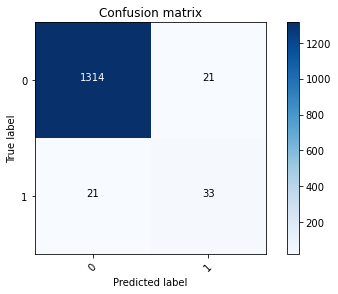

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1335
           1       0.61      0.61      0.61        54

    accuracy                           0.97      1389
   macro avg       0.80      0.80      0.80      1389
weighted avg       0.97      0.97      0.97      1389



In [101]:
#confusion Matrix
plt.figure()
cf_matrix_op =confusion_matrix(y_val, ypred_opt, labels = [0,1])
np.set_printoptions(precision=2)
plot_confusion_matrix(cf_matrix_op, classes = [0,1], normalize= False,  title='Confusion matrix')
plt.show()
print (classification_report(y_val, ypred_opt))

In [102]:
matrix.at['Random Forest',['Jaccard','F1-score','LogLoss','Accuracy','Recall','Precision']] = [jaccard_RF,f1_RF,log_RF,accuracy_RF,recall_RF,precision_RF]
matrix.at['Decision Tree',['Jaccard','F1-score','LogLoss','Accuracy','Recall','Precision']] = [jaccard_DT,f1_DT,logLoss_DT,accuracy_DT,recall_DT,precision_DT]
matrix.at['SVM',['Jaccard','F1-score','LogLoss','Accuracy','Recall','Precision']] = [jaccard_SVM,f1_SVM,logLoss_SVM,accuracy_SVM,recall_SVM,precision_SVM]
matrix.at['Logistic Regression',['Jaccard','F1-score','LogLoss','Accuracy','Recall','Precision']] = [jaccard_LR,f1_LR,logLoss_LR,accuracy_LR,recall_LR,precision_LR]
matrix.at['LightGBM',['Jaccard','F1-score','LogLoss','Accuracy','Recall','Precision']] = [jaccard_LGBM,f1_LGBM,logLoss_LGBM,accuracy_LGBM,recall_LGBM,precision_LGBM]
matrix.at['LightGBM_OPT',['Jaccard','F1-score','LogLoss','Accuracy','Recall','Precision']] = [jaccard_opt,f1_opt,logLoss_opt,accuracy_opt,recall_opt,precision_opt]
matrix

,Jaccard,F1-score,LogLoss,Accuracy,Recall,Precision
Algorithm,,,,,,
Random Forest,0.153226,0.890461,5.221957,0.848812,0.848812,0.954200
Decision Tree,0.163866,0.895596,4.948426,0.856731,0.856731,0.955558
SVM,0.052058,0.570754,19.470467,0.436285,0.436285,0.944756
Logistic Regression,0.078624,0.812699,9.324927,0.730022,0.730022,0.943294
LightGBM,0.355263,0.963900,1.218443,0.964723,0.964723,0.963179
LightGBM_OPT,0.440000,0.969762,1.044381,0.969762,0.969762,0.969762


In [ ]:
#KNN
import pickle    
with open('KDD_model.pkl', 'wb') as model_file:
  pickle.dump(neighKNN, model_file)

## Optuna 

In [80]:
def objective(trial):
    #Split Train - Test. 80%-20%
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2,stratify=df_encoder["Estado_label"])
    # del 80% del test sacamos 10% para validacion queda 72% train 20%  valid 8%
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=2)

    
    #X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=2, stratify=df_encoder["Estado_label"])
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
    # transform the dataset  SMOTE
    oversample = SMOTE()
    X_train, y_train = oversample.fit_resample(X_train, y_train)
    dtrain = lgb.Dataset(X_train, label=y_train)
    param = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        }    
        
        
    gbm = lgb.train(param, dtrain)
    preds = gbm.predict(X_test)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_test, pred_labels)
    return accuracy
    

In [81]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2021-12-05 20:53:41,151] A new study created in memory with name: no-name-0199cd00-3718-429e-a4f1-81b5eda43826
[I 2021-12-05 20:53:42,881] Trial 0 finished with value: 0.9340437788018433 and parameters: {'lambda_l1': 9.216871792338734, 'lambda_l2': 0.0003630260218771075, 'num_leaves': 5, 'feature_fraction': 0.6595360723512765, 'bagging_fraction': 0.4455050009922444, 'bagging_freq': 3, 'min_child_samples': 23}. Best is trial 0 with value: 0.9340437788018433.
[I 2021-12-05 20:53:52,200] Trial 1 finished with value: 0.9700460829493087 and parameters: {'lambda_l1': 7.458380269408399e-05, 'lambda_l2': 1.0908838530390997e-06, 'num_leaves': 40, 'feature_fraction': 0.7202784291064152, 'bagging_fraction': 0.6465236364164685, 'bagging_freq': 3, 'min_child_samples': 80}. Best is trial 1 with value: 0.9700460829493087.
[I 2021-12-05 20:53:53,355] Trial 2 finished with value: 0.9691820276497696 and parameters: {'lambda_l1': 6.111140579406084e-07, 'lambda_l2': 0.0014768861844953053, 'num_leaves':

[I 2021-12-05 20:58:57,530] Trial 22 finished with value: 0.9688940092165899 and parameters: {'lambda_l1': 2.820368105610293e-08, 'lambda_l2': 0.00030616923348387645, 'num_leaves': 64, 'feature_fraction': 0.8064737008689037, 'bagging_fraction': 0.9999363532091842, 'bagging_freq': 2, 'min_child_samples': 55}. Best is trial 21 with value: 0.9706221198156681.
[I 2021-12-05 20:59:01,531] Trial 23 finished with value: 0.9691820276497696 and parameters: {'lambda_l1': 6.027488880312368e-08, 'lambda_l2': 0.0002508313222671922, 'num_leaves': 92, 'feature_fraction': 0.7069470162482709, 'bagging_fraction': 0.9198352306350019, 'bagging_freq': 2, 'min_child_samples': 47}. Best is trial 21 with value: 0.9706221198156681.
[I 2021-12-05 21:00:13,930] Trial 24 finished with value: 0.967741935483871 and parameters: {'lambda_l1': 3.4691070677288853e-06, 'lambda_l2': 6.0476131660729155e-05, 'num_leaves': 111, 'feature_fraction': 0.7386544265585476, 'bagging_fraction': 0.9761914005265311, 'bagging_freq': 1

[I 2021-12-05 21:07:52,126] Trial 45 finished with value: 0.9674539170506913 and parameters: {'lambda_l1': 2.2035542360211898e-06, 'lambda_l2': 0.00549371713086108, 'num_leaves': 16, 'feature_fraction': 0.9599035855067884, 'bagging_fraction': 0.9682883558679948, 'bagging_freq': 4, 'min_child_samples': 19}. Best is trial 42 with value: 0.9717741935483871.
[I 2021-12-05 21:07:54,785] Trial 46 finished with value: 0.9694700460829493 and parameters: {'lambda_l1': 1.3851008964004437e-07, 'lambda_l2': 2.5312193104132907, 'num_leaves': 38, 'feature_fraction': 0.9984985951309705, 'bagging_fraction': 0.8436102200611112, 'bagging_freq': 6, 'min_child_samples': 44}. Best is trial 42 with value: 0.9717741935483871.
[I 2021-12-05 21:07:57,976] Trial 47 finished with value: 0.9694700460829493 and parameters: {'lambda_l1': 0.00010641805572797898, 'lambda_l2': 0.07752927903758589, 'num_leaves': 51, 'feature_fraction': 0.8682282357951164, 'bagging_fraction': 0.9415026316652977, 'bagging_freq': 3, 'min_

[I 2021-12-05 21:12:07,480] Trial 68 finished with value: 0.9691820276497696 and parameters: {'lambda_l1': 2.0180373661549835e-06, 'lambda_l2': 4.781321459301196, 'num_leaves': 100, 'feature_fraction': 0.6569321520908961, 'bagging_fraction': 0.9561687810230074, 'bagging_freq': 3, 'min_child_samples': 58}. Best is trial 42 with value: 0.9717741935483871.
[I 2021-12-05 21:12:27,580] Trial 69 finished with value: 0.9700460829493087 and parameters: {'lambda_l1': 2.5522362670243666e-08, 'lambda_l2': 0.34443801386969486, 'num_leaves': 74, 'feature_fraction': 0.6429754740532655, 'bagging_fraction': 0.8861187525243595, 'bagging_freq': 4, 'min_child_samples': 64}. Best is trial 42 with value: 0.9717741935483871.
[I 2021-12-05 21:12:52,212] Trial 70 finished with value: 0.969758064516129 and parameters: {'lambda_l1': 5.793649417775994e-06, 'lambda_l2': 1.2104338055931627, 'num_leaves': 62, 'feature_fraction': 0.5829618370374342, 'bagging_fraction': 0.9331370640106393, 'bagging_freq': 7, 'min_chi

[I 2021-12-05 21:17:49,154] Trial 91 finished with value: 0.9700460829493087 and parameters: {'lambda_l1': 1.4997980743420016e-07, 'lambda_l2': 0.444826523828453, 'num_leaves': 62, 'feature_fraction': 0.7497618201957966, 'bagging_fraction': 0.9681818007285065, 'bagging_freq': 3, 'min_child_samples': 63}. Best is trial 42 with value: 0.9717741935483871.
[I 2021-12-05 21:17:50,074] Trial 92 finished with value: 0.970910138248848 and parameters: {'lambda_l1': 4.1695035764840527e-07, 'lambda_l2': 0.0238803111977165, 'num_leaves': 30, 'feature_fraction': 0.6951848961982638, 'bagging_fraction': 0.944709575364596, 'bagging_freq': 4, 'min_child_samples': 60}. Best is trial 42 with value: 0.9717741935483871.
[I 2021-12-05 21:17:51,190] Trial 93 finished with value: 0.9706221198156681 and parameters: {'lambda_l1': 5.77564870375082e-08, 'lambda_l2': 0.0053903261581002325, 'num_leaves': 46, 'feature_fraction': 0.6286118631469644, 'bagging_fraction': 0.9597617332040159, 'bagging_freq': 3, 'min_chil

Number of finished trials: 100
Best trial:
  Value: 0.9717741935483871
  Params: 
    lambda_l1: 7.006140540853023e-07
    lambda_l2: 0.0561544121704266
    num_leaves: 36
    feature_fraction: 0.9122421515143498
    bagging_fraction: 0.9736128016472886
    bagging_freq: 4
    min_child_samples: 24


### validacion lightGBM con optimizacion de parametros 

In [82]:
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [83]:
## parametros para el modelo lightGBM search 
SEARCH_PARAMETROS = {'learning_rate': 0.4,
                'max_depth': 15,
                #'num_leaves': 32,
                #'feature_fraction': 0.8,
                'subsample': 0.2}

FIXED_PARAMETROS={'objective': 'binary',
             'metric': 'binary_logloss',
             "verbosity": -1,
             'is_unbalance':False,
             'bagging_freq':1,
             'boosting':'gbdt',
             'num_boost_round':300,
             "lambda_l1":7.006140540853023e-07,
             "lambda_l2":0.0561544121704266,
             "num_leaves":36,
             "feature_fraction":0.9122421515143498,
             "bagging_fraction":0.9736128016472886,
             "bagging_freq":4,
             "min_child_samples":24,
             'early_stopping_rounds':30}



In [84]:
parametros = {'metric':FIXED_PARAMETROS['metric'],
             'objective':FIXED_PARAMETROS['objective'],**SEARCH_PARAMETROS}

In [85]:
model_opt = lgb.train(parametros, train_data,                     
                     valid_sets=[valid_data],
                     num_boost_round=FIXED_PARAMETROS['num_boost_round'],
                     early_stopping_rounds=FIXED_PARAMETROS['early_stopping_rounds'],
                     valid_names=['valid'])

C:\Users\d84088661\Anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 12110, number of negative: 12110
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001657 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1779
[LightGBM] [Info] Number of data points in the train set: 24220, number of used features: 7
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[1]	valid's binary_logloss: 0.442294
Training until validation scores don't improve for 30 rounds
[2]	valid's binary_logloss: 0.322857
[3]	valid's binary_logloss: 0.2618

In [86]:
ypred_opt_test = model_opt.predict(X_val, num_iteration=model_opt.best_iteration)

In [87]:
#convert into binary values	
for i in range(0,len(X_val)):	
    if ypred_opt_test[i]>=.5:       # setting threshold to .5	
            ypred_opt_test[i]=1
    else:
        ypred_opt_test[i]=0

In [88]:
# conocer el numero de iteraciones realizadas por el modelo
print(model_opt.best_iteration)

34


In [89]:
print(classification_report(y_val, ypred_opt_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1335
           1       0.61      0.61      0.61        54

    accuracy                           0.97      1389
   macro avg       0.80      0.80      0.80      1389
weighted avg       0.97      0.97      0.97      1389



In [90]:
accuracy_lgbm_opt=accuracy_score(y_val,ypred_opt_test)
accuracy_lgbm_opt

0.9697624190064795

In [91]:
logLoss_lgbm_opt=log_loss(y_val, ypred_opt_test)
logLoss_lgbm_opt

1.0443811376042362

<AxesSubplot:>

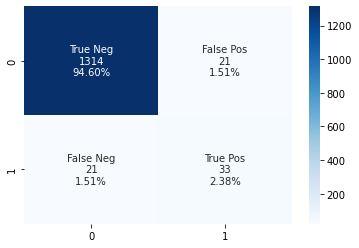

In [92]:
#confusion Matrix
plt.figure()
cf_matrix_new =confusion_matrix(y_val, ypred_opt_test,labels = [0,1])
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_new.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_new.flatten()/np.sum(cf_matrix_new)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_new, annot=labels, fmt='', cmap='Blues')

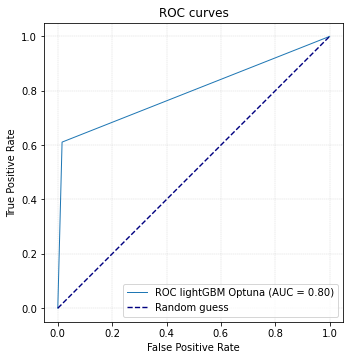

In [93]:
### curva roc
roc_lgbm_opt = metrics.roc_curve(y_val, ypred_opt_test)
auc_lgbm_opt = metrics.auc( roc_lgbm_opt[0], roc_lgbm_opt[1] )


plt.figure(figsize=(5.5,5.5))
plt.plot(roc_lgbm_opt[0], roc_lgbm_opt[1], lw=1,label=f"ROC lightGBM Optuna (AUC = {auc_lgbm_opt:0.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=1.4, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc='lower right')
plt.gca().set_aspect(1)
plt.grid(ls='--', alpha=0.6, lw=0.4)

### Exporte del modelo

In [104]:
import joblib
filename = r"C:\Users\d84088661\model_DT.pkl"
joblib.dump(drugTree, filename)

['C:\\Users\\d84088661\\model_DT.pkl']

### Evaluacion 3 modelos

In [109]:
columns=['Algorithm','F1-score','LogLoss','Accuracy','Recall','Precision']
matrix=pd.DataFrame([['Random Forest',0,'NA',0,0,0],
                     ['Decision Tree',0,'NA',0,0,0],
                     ['LightGBM_OPT',0,'NA',0,0,0]],columns=columns)
matrix=matrix.set_index('Algorithm')
matrix

,F1-score,LogLoss,Accuracy,Recall,Precision
Algorithm,,,,,
Random Forest,0,NA,0,0,0
Decision Tree,0,NA,0,0,0
LightGBM_OPT,0,NA,0,0,0


In [110]:
matrix.at['Random Forest',['F1-score','LogLoss','Accuracy','Recall','Precision']] = [f1_RF,log_RF,accuracy_RF,recall_RF,precision_RF]
matrix.at['Decision Tree',['F1-score','LogLoss','Accuracy','Recall','Precision']] = [f1_DT,logLoss_DT,accuracy_DT,recall_DT,precision_DT]
matrix.at['LightGBM_OPT',['F1-score','LogLoss','Accuracy','Recall','Precision']] = [f1_opt,logLoss_opt,accuracy_opt,recall_opt,precision_opt]
matrix

,F1-score,LogLoss,Accuracy,Recall,Precision
Algorithm,,,,,
Random Forest,0.890461,5.221957,0.848812,0.848812,0.954200
Decision Tree,0.895596,4.948426,0.856731,0.856731,0.955558
LightGBM_OPT,0.969762,1.044381,0.969762,0.969762,0.969762
